# week-12 Homework Assignment

1.	In 250-500 words, write a thorough discussion of when to use ML and when not to. Do NOT go over the 500-word limit. It is essential to express this concisely. This should be informed by the Machine Learning for Business DataCamp course. 

Machine learning is a model used to predict future events better and understand patterns in data.

We have steps that need to be followed in order to use Machine Learning, this was explained in Data Camp with the concept of
data hierarchy of needs, also called a data needs pyramid, Which is constructed in the order of their priority, starting
with basic level which is data collection followed by storage, preparation i.e, organizing and cleaning the data, then, 
Analysis , Model prototyping and testing  where we understand the trends in the data and use machine learning models to 
gain insights into causal drivers of the desired output and run experiments, finally we reach to ML in production.

Machine learning models use the input features and then predict the target variable.

Main thing that I learnt from Data Camp, is if we have a good chance of conducting experiments then we 
Should proceed with the experiment as it will be faster and much more accurate than a causal model.
If in case that is not possible to conduct everywhere then we can run them less frequently, with baseline
Effect for making decisions in predicting models. If both the ways are not working then only we can go for causal or 
inference model.
Unfortunately, experiments are not possible to perform all the times due to ethical, cost, or due to many other reasons. 
Then researchers will try to pick for observational data and extract causal relations there.
For Example : Practically conducting toxicology experimentation invitro to assess the impact of chemicals on human beings
would be unethical in terms of mass scale. In such cases we can take advantage of causal machine learning models to know 
the effect of chemicals on humans based on the data acquired from humans who were already expose to such chemicals  accidentally, 
and comparing their health indicators to people without prior exposure.  







2.	Perform pre-processing on the Lending Club dataset from class. Clearly use markdown to indicate each pre-processing step you are using. Note: you should use at least three different techniques. 

Data Preprocessing is a process of cleaning the raw data, by removing all the features with missing data, removing duplicate
values and also converting categorical data into numeric data as Machine learning models require all input and output variables
to be numeric.

In [69]:
#importing libraries:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv("A:\launch_code_STL\Final_Homework\week-12\loans_full_schema.csv")
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [6]:
#shape of the dataset
print("Number of columns",len(df.columns))
print("Number of rows",len(df.index))

Number of columns 55
Number of rows 10000


In [68]:
df.describe()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000000,1.000000e+04,9976.000000,1.495000e+03,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,1.279146e+05,19.979304,0.21600,36.760709,2001.29000,1.95820,22.679600,...,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,3.703734,6.473429e+04,15.004851,7.016838e+04,8.054781,0.68366,21.634939,7.79551,2.38013,11.885439,...,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000e+00,0.000000,1.920000e+04,0.320000,0.00000,1.000000,1963.00000,0.00000,2.000000,...,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.500000e+04,11.057500,8.683350e+04,14.160000,0.00000,19.000000,1997.00000,0.00000,14.000000,...,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,6.000000,6.500000e+04,17.570000,1.130000e+05,19.720000,0.00000,34.000000,2003.00000,1.00000,21.000000,...,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,10.000000,9.500000e+04,25.002500,1.515455e+05,25.500000,0.00000,53.000000,2006.00000,3.00000,29.000000,...,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10.000000,2.300000e+06,469.090000,1.100000e+06,39.980000,13.00000,118.000000,2015.00000,29.00000,87.000000,...,3.000000,40000.000000,60.000000,30.940000,1566.590000,40000.000000,41630.443684,40000.000000,4216.440000,52.980000


### Data Cleaning

In [8]:
# Checking if there are any duplicate entries in the dataset
if(len(df) == len(df.emp_title.unique())):
    print("No duplicate data found!")
else:
    print("Some duplicates occur.")

Some duplicates occur.


In [71]:
# removing duplicates 
df.drop_duplicates()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


In [11]:
# checking for columns with all NA values
print("Completely Null values:")
print(list(df.columns[round(df.isnull().sum()/len(df.index), 2)*100 == 100]))

Completely Null values:
[]


 we dont have any column with all the  null values found in our dataset.

In [58]:
df['loan_status'].value_counts()

Current               9375
Fully Paid             447
In Grace Period         67
Late (31-120 days)      66
Late (16-30 days)       38
Charged Off              7
Name: loan_status, dtype: int64

As we can see, we have a lot of loans which are current with fair amount of fully paid loans. other categories are having 
a really low number.This means the data is imbalanced.

In [5]:
# Checking null values
df.isnull()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [6]:
# Displaying the count of null values per column
df.isnull().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

As per my observation there are columns which have most of the data missing. so, if i use dropna() to drop all the columns
with missing data i will be left with only 201 rows and 55 coulmns. To deal with maximum data i would like to drop all the
columns which have more than 1000 record missing.

### Removing null values

In [34]:
# Dropping the row having null value
df.dropna()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
37,supplies clerk,10.0,NJ,MORTGAGE,70000.0,Verified,17.06,105000.0,Verified,13.27,...,C4,Mar-2018,In Grace Period,whole,Cash,23455.27,1102.83,544.73,558.10,0.0
99,owner,10.0,MN,MORTGAGE,23000.0,Verified,49.58,98000.0,Verified,19.87,...,D4,Feb-2018,Current,whole,Cash,14395.45,1572.97,604.55,968.42,0.0
130,military officer captain,10.0,GA,RENT,145000.0,Verified,14.66,155000.0,Source Verified,14.98,...,A3,Feb-2018,Current,whole,Cash,35942.19,4890.01,4057.81,832.20,0.0
214,realtor / assistant,5.0,NJ,MORTGAGE,80000.0,Not Verified,18.39,125000.0,Not Verified,11.77,...,B1,Jan-2018,Current,whole,Cash,13068.02,1460.76,931.98,528.78,0.0
352,manager,10.0,TX,MORTGAGE,120000.0,Verified,7.81,198000.0,Verified,15.15,...,A4,Jan-2018,Current,whole,Cash,21847.54,3859.28,3152.46,706.82,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9821,management,10.0,AZ,MORTGAGE,88000.0,Source Verified,32.28,136000.0,Source Verified,24.13,...,B3,Jan-2018,Current,whole,Cash,17414.85,1987.17,1210.15,777.02,0.0
9877,charger operator,9.0,MN,MORTGAGE,31000.0,Verified,1.94,94300.0,Verified,15.41,...,B5,Jan-2018,Current,whole,Cash,11250.27,1326.41,749.73,576.68,0.0
9880,truck driving,10.0,MN,MORTGAGE,112000.0,Source Verified,18.60,172000.0,Source Verified,20.84,...,B3,Jan-2018,Current,whole,Cash,28447.40,2557.15,1552.60,1004.55,0.0
9893,teacher,10.0,NJ,MORTGAGE,60000.0,Source Verified,31.18,180000.0,Source Verified,31.73,...,D3,Mar-2018,Current,whole,Cash,35603.47,4162.06,2396.53,1765.53,0.0


In [73]:
var_drop = df.drop(['annual_income_joint', 'verification_income_joint', 'debt_to_income_joint', 'months_since_last_delinq', 'months_since_90d_late', 'months_since_last_credit_inquiry'],  axis=1)
var_drop.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,2001,6,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,0,1996,1,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,0,2006,4,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,0,2007,0,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,0,2008,7,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [10]:
var_drop.dropna()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,2001,6,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,0,1996,1,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,0,2006,4,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,0,2007,0,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,0,2008,7,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,0,2008,5,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,4,1994,1,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,2,2004,0,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,0,1999,1,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


### Encoding the Categorical Features

We can do this in two ways : 
    
    1.By using pd.get_dummies()

    2.By using, sklearn’s in-built function of OneHotEncoder and LabelEncoder

In [66]:
# Using One-Hot Encoding
df_loan_purpose = pd.get_dummies(df['loan_purpose'],drop_first=True)
df_loan_purpose.head()

,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation
0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0


In [67]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

"""Categorical data to be converted to numeric data"""
# LabelEncoder
LabelEncoder = LabelEncoder()
integer_encoder = LabelEncoder.fit_transform(df['loan_purpose'].values)
print(integer_encoder)

# OneHotEncoder
onehot_encoder= OneHotEncoder(sparse=False, dtype='int')    
integer_encoder = integer_encoder.reshape(len(integer_encoder), 1)
onehot_encoder= onehot_encoder.fit_transform(integer_encoder)
print(onehot_encoder)

[7 2 8 ... 2 8 1]
[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [50]:
codes, uniques = pd.factorize(df['loan_status'])
loan_codes = pd.Series(codes)
loan_codes.value_counts()

0    9375
1     447
2      67
3      66
5      38
4       7
dtype: int64

3.	Create a correlation matrix with a heatmap for the features in the Lending Club dataset. Use markdown to write about your takeaways in under 250 words.

Feature Information of Loan Variables such as loan amount, term, interest rate, etc which shows the information about the 
loan that will help us in finding loan default.

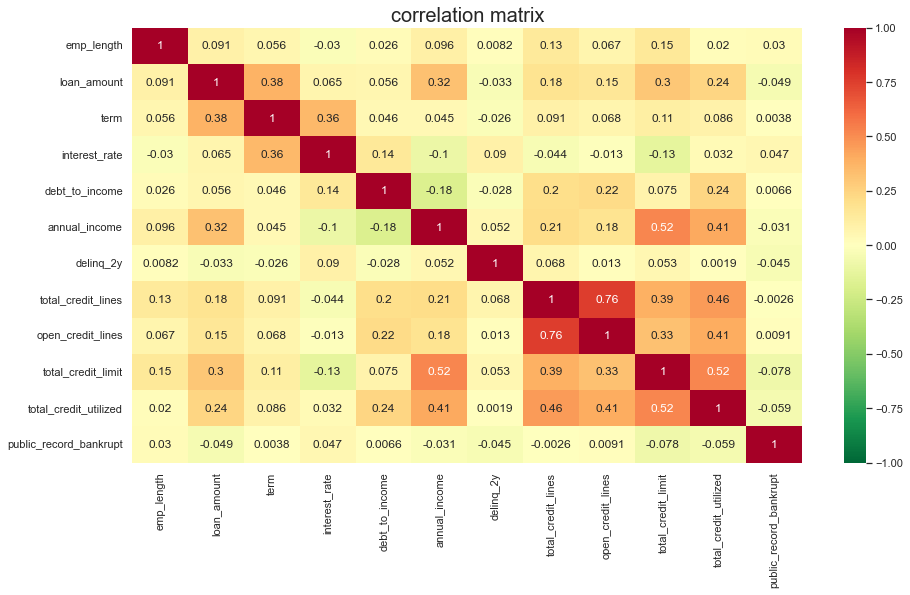

In [220]:
# creating a correlation matrix for features 

features = ['emp_length', 'loan_purpose', 'loan_amount', 'term', 'interest_rate', 'debt_to_income', 'annual_income', 'delinq_2y', 'homeownership', 'total_credit_lines', 'open_credit_lines', 'total_credit_limit', 'total_credit_utilized', 'public_record_bankrupt']
corr_df = df[features].corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr_df,vmin=-1.0,vmax=1.0,annot=True, cmap ="RdYlGn_r")
plt.title("correlation matrix", size=20)
plt.show()

From the above plot, we can say that:
1) open_credit_lines has a good correlation with Total_credit_lines (0.76), 

2) moderate correlation exists between total_credit_limit and annual_income (0.52),

3) Almost no correlation between open_credit_lines and public_record_bankrupt(0.0091), and

4) Negative correlation exists between debt_to_income and annual_income(-0.18).

Correlation Matrix Heat Maps allows us in visualizing the Multivariate analysis to see the correaltion between various 
features and determine the KPIs or KRIs. The colour and the intensity of each cell in a heatmap depicts the magnitude and 
direction of correlation

Feature Information
Loan Variables such as loan amount, term, interest rate, etc which shows the information about the loan that will help us 
in finding loan default.

Profile Variables such as emp_title, verified_income, etc. which shows the information about the borrower profile is not useful for us.


4.	Create a histogram showing the frequency of loan_amounts. Describe what you see. Pay special attention to bin sizes, and clearly describe how you chose your bin sizes. 

In [14]:
# finding frequency of loan_amounts using histogram plot:

loan_amt = df[['loan_amount']].dropna()
loan_amt.describe()

,loan_amount
count,10000.000000
mean,16361.922500
std,10301.956759
min,1000.000000
25%,8000.000000
50%,14500.000000
75%,24000.000000
max,40000.000000


This is to determine the minimum and maximum values which in turn indicates the range of the data to assist in evaluating 
the bin size of the histogram plot.

In this case the min = 1000 and the max = 40000

[Text(0.5, 1.0, 'Frequency Histogarm of loan amount'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Loan Amount')]

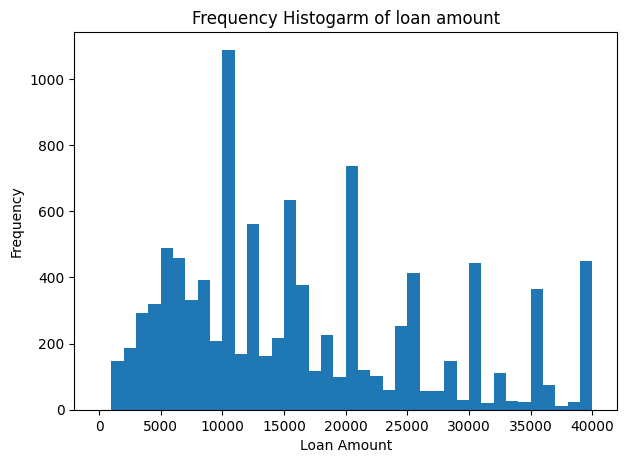

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# plot histogram for frequency of loan amount
plt.hist(loan_amt, bins =40, range=[0, 40000])
plt.gca().set(title='Frequency Histogarm of loan amount', ylabel ='Frequency', xlabel='Loan Amount')


Based on the range of the Loan_amount data i.e., 1000-40000, i have choose the number of bins as 40 to divide each bin
to contain 1000. so, my bin size here is 1000 as each bar represents this bin
 

5.	Create a new column called region that uses a lambda and shows which part of the US someone lives in, split up into Pacific, Plains, Midwest, Northeast, and South. Consider having your lambda call a function. 
a.	Is there a better way to do this than with a lambda? 
b.	Either use two different lambdas or a lambda and a different technique and see which one is more performant. Explain your findings in the markdown. 


In [156]:
loan_amt = df[['state', 'loan_amount']].dropna()
loan_amt

,state,loan_amount
0,NJ,28000
1,HI,5000
2,WI,2000
3,PA,21600
4,CA,23000
...,...,...
9995,TX,24000
9996,PA,10000
9997,CT,30000
9998,WI,24000


In [157]:
regions = {
'AK' : 'Pacific',
'AL' : 'South',
'AR' : 'South',
'AZ' : 'West',
'CA' : 'Pacific',
'CO' : 'Plains',
'CT' : 'North East',
'DC' : 'West',
'DE' : 'South',
'FL' : 'South',
'GA' : 'South',
'HI' : 'Pacific',
'ID' : 'West',
'IL' : 'Midwest',
'IN' : 'Midwest',
'KS' : 'Plains',
'KY' : 'South',
'LA' : 'South',
'MA' : 'North East',
'MD' : 'South',
'ME' : 'North East',
'MI' : 'Midwest',
'MN' : 'Midwest',
'MO' : 'Midwest',
'MS' : 'South',
'MT' : 'Plains',
'NB' : 'Plains',
'NC' : 'South',
'ND' : 'Plains',
'NE' : 'Midwest',
'NH' : 'North East',
'NJ' : 'North East',
'NM' : 'Plains',
'NV' : 'West',
'NY' : 'North East',
'OH' : 'Midwest',
'OK' : 'Plains',
'OR' : 'Pacific',
'PA' : 'North East',
'RI' : 'North East',
'SC' : 'South',
'SD' : 'Plains',
'TN' : 'South',
'TX' : 'Plains',
'UT' : 'West',
'VA' : 'South',
'VT' : 'North East',
'WA' : 'Pacific',
'WI' : 'Midwest',
'WV' : 'South',
'WY' : 'Plains'
}

### using lambda function

In [159]:
def get_region(state):
    return regions[state]

loan_amt['Region']=loan_amt.apply(lambda x: get_region(x['state']), axis=1)
loan_amt

,state,loan_amount,Region
0,NJ,28000,North East
1,HI,5000,Pacific
2,WI,2000,Midwest
3,PA,21600,North East
4,CA,23000,Pacific
...,...,...,...
9995,TX,24000,Plains
9996,PA,10000,North East
9997,CT,30000,North East
9998,WI,24000,Midwest


### using pandas.apply() function

In [158]:
# defining the function to get region
def get_region(state):
    return regions[state]

# using pandas apply function to get 'Region' column.
loan_amt['Region'] = loan_amt['state'].apply(get_region)
loan_amt

,state,loan_amount,Region
0,NJ,28000,North East
1,HI,5000,Pacific
2,WI,2000,Midwest
3,PA,21600,North East
4,CA,23000,Pacific
...,...,...,...
9995,TX,24000,Plains
9996,PA,10000,North East
9997,CT,30000,North East
9998,WI,24000,Midwest


6.	Create subplot histograms to show if loan_amounts differ by region. Summarize your findings.

In [222]:
#creating a new dataframe with two columns 
loan_amt = df[['state', 'loan_amount']].dropna()
loan_amt

,state,loan_amount
0,NJ,28000
1,HI,5000
2,WI,2000
3,PA,21600
4,CA,23000
...,...,...
9995,TX,24000
9996,PA,10000
9997,CT,30000
9998,WI,24000


In [175]:
#passing a new list called regions along with the states
regions = {
'AK' : 'West',
'AL' : 'South',
'AR' : 'South',
'AZ' : 'West',
'CA' : 'West',
'CO' : 'West',
'CT' : 'North East',
'DC' : 'West',
'DE' : 'South',
'FL' : 'South',
'GA' : 'South',
'HI' : 'West',
'ID' : 'West',
'IL' : 'Midwest',
'IN' : 'Midwest',
'KS' : 'Midwest',
'KY' : 'South',
'LA' : 'South',
'MA' : 'North East',
'MD' : 'South',
'ME' : 'North East',
'MI' : 'Midwest',
'MN' : 'Midwest',
'MO' : 'Midwest',
'MS' : 'South',
'MT' : 'Midwest',
'NC' : 'South',
'ND' : 'Midwest',
'NE' : 'Midwest',
'NH' : 'North East',
'NJ' : 'North East',
'NM' : 'West',
'NV' : 'West',
'NY' : 'North East',
'OH' : 'Midwest',
'OK' : 'South',
'OR' : 'West',
'PA' : 'North East',
'RI' : 'North East',
'SC' : 'South',
'SD' : 'Midwest',
'TN' : 'South',
'TX' : 'South',
'UT' : 'West',
'VA' : 'South',
'VT' : 'North East',
'WA' : 'West',
'WI' : 'Midwest',
'WV' : 'South',
'WY' : 'West'
}

# defining the function to get region
def get_region(state):
    return regions[state]

# using pandas apply function to get 'Region' column.
loan_amt['Region'] = loan_amt['state'].apply(get_region)
loan_amt

,state,loan_amount,Region
0,NJ,28000,North East
1,HI,5000,West
2,WI,2000,Midwest
3,PA,21600,North East
4,CA,23000,West
...,...,...,...
9995,TX,24000,South
9996,PA,10000,North East
9997,CT,30000,North East
9998,WI,24000,Midwest


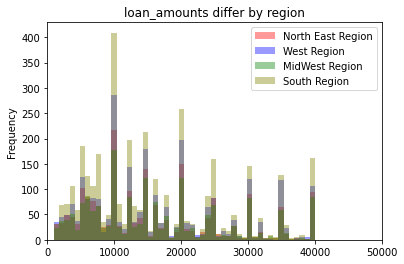

In [176]:
state_NE = loan_amt.loc[loan_amt.Region=='North East', 'loan_amount']
state_W = loan_amt.loc[loan_amt.Region=='West', 'loan_amount']
state_MW = loan_amt.loc[loan_amt.Region=='Midwest', 'loan_amount']
state_S = loan_amt.loc[loan_amt.Region=='South', 'loan_amount']

kwargs = dict(alpha=0.4, bins=50)

plt.hist(state_NE, **kwargs, color ='r', label='North East Region')
plt.hist(state_W, **kwargs, color = 'b', label='West Region')
plt.hist(state_MW, **kwargs, color = 'g', label='MidWest Region')
plt.hist(state_S, **kwargs, color = 'olive', label='South Region')
plt.gca().set(title='loan_amounts differ by region', ylabel='Frequency')
plt.xlim(0, 50000)
plt.legend()
plt.show()

Text(0.5, 1.05, 'loan_amount by region in the US')

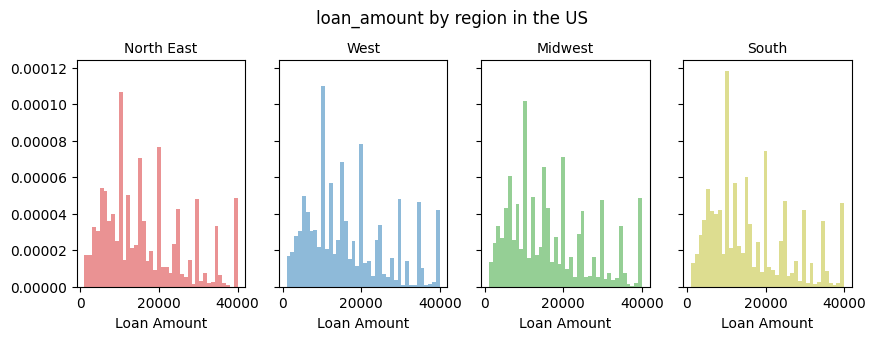

In [185]:
fig, axes = plt.subplots(1, 4, figsize=(10,3), dpi=100, sharex=True, sharey=True)
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:olive']

for i, (ax, Region) in enumerate(zip(axes.flatten(), loan_amt.Region.unique())):
    x = df.loc[loan_amt.Region==Region, 'loan_amount']
    ax.hist(x, alpha=0.5, bins=40, density=True, stacked=True, label=str('Region'), color=colors[i])
    ax.set_title(Region, size=10)
    ax.set_xlabel('Loan Amount')

plt.suptitle('loan_amount by region in the US', y=1.05, size=12)


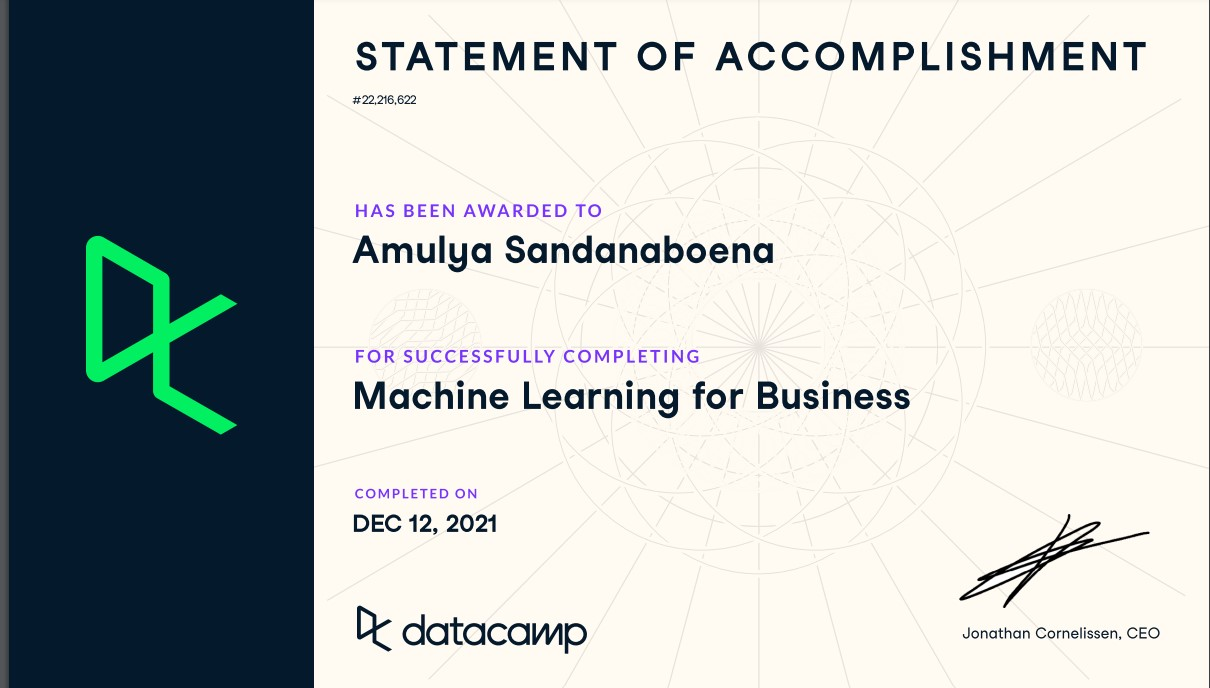

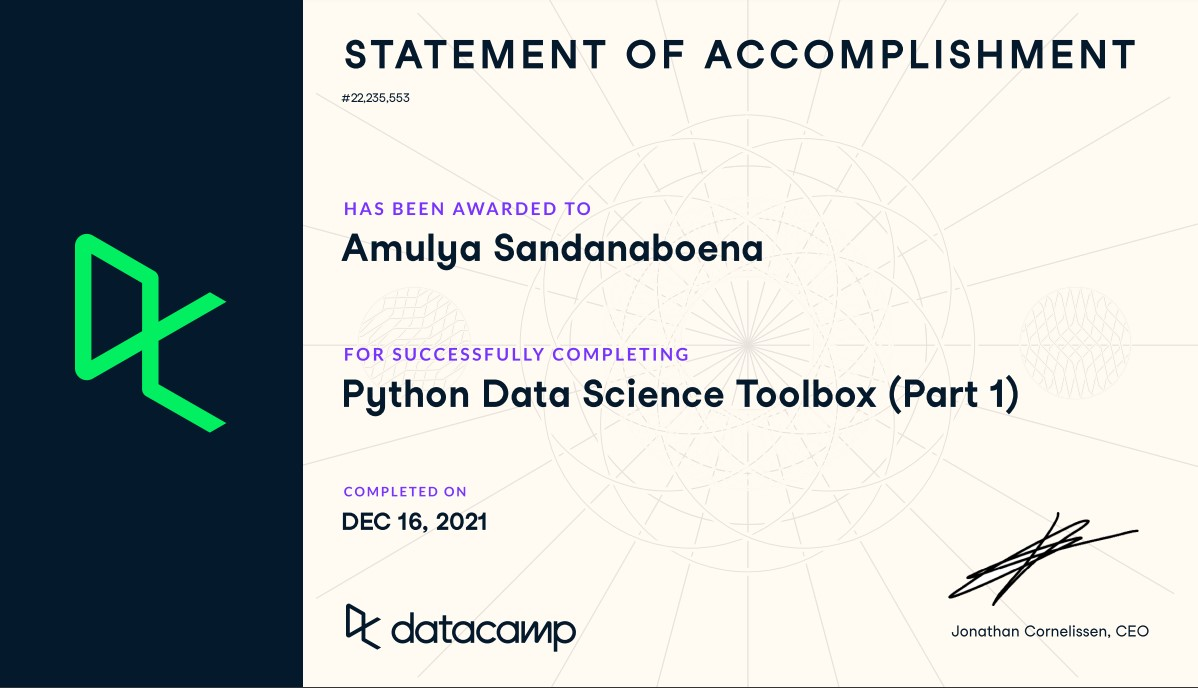